In [7]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import RegularGridInterpolator
import pandas as pd
import random
import math
import copy
from typing import Annotated, Any, Callable
from pydantic import BaseModel, Field, WithJsonSchema
import pydantic
import ipywidgets as widgets
import random
from typing import (
    Any, Callable, Optional, Sequence, Union, Tuple, Dict, List
)

In [2]:
%load_ext autoreload
%autoreload 2

import sys
for p in ['../src']:
    if p not in sys.path:
        sys.path.append(p)
        
import spikeml as sml
from spikeml.utils.nb_util import xdisplay, Markup
from spikeml.core.signal import signal_dc, signal_pulse, encode1_onehot, encode_onehot, signal_ranges, mean_per_input

from spikeml.plot.plot_util import plot_hist, plot_data, plot_lidata, plot_input, plot_xt, plot_mt, plot_spikes, imshow_matrix, imshow_nmatrix
from spikeml.core.params import Params, NNParams, ConnectorParams, SpikeParams, SSensorParams, SNNParams, SSNNParams

from spikeml.core.spikes import pspike, spike


# plot_data 

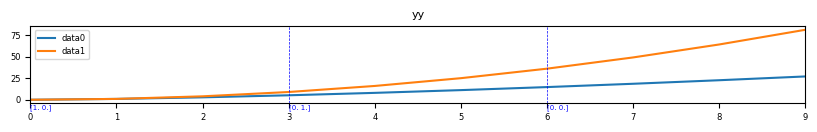

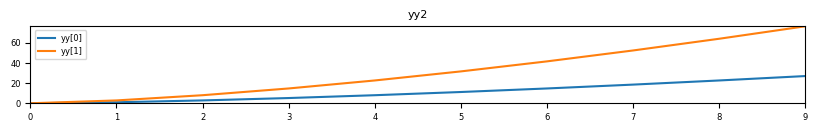

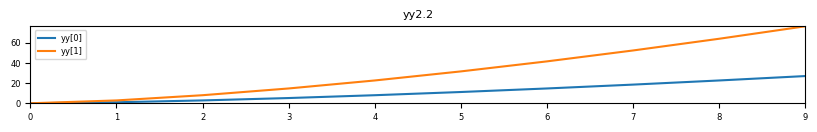

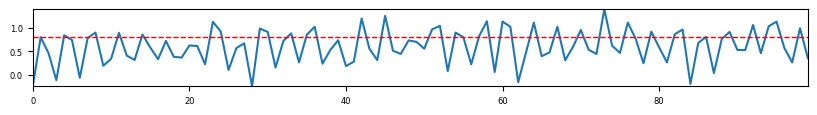

In [3]:
def test_plot_data():
    data0 = [t**1.5 for t in range(0,10)]
    data1 = [t**2 for t in range(0,10)]
    data = {'data0': data0, 'data1': data1 }
    ss = signal_pulse(2, T=3, L=1, s=[0,1,-1], value=1)
    plot_data(data, title='yy', callback=lambda ax: plot_input(ss,ax=ax))
    data = [np.array([1*t,2*t])**1.5 for t in range(0,10)]
    plot_data(data, title='yy2', label='yy')#['y1','y2']
    plot_data(np.array(data), title='yy2.2', label='yy')#['y1','y2']

def test_plot_lidata():
    t = np.linspace(0, 100, num=100)
    x = np.abs(np.sin(t)) + np.random.normal(loc=0, scale=.2, size=t.shape[0])
    k_x = .8
    plot_lidata(x, k_x)

test_plot_data()
test_plot_lidata()

# imshow_matrix

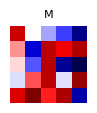

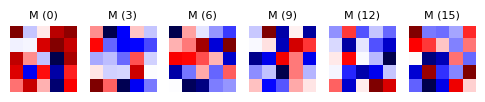

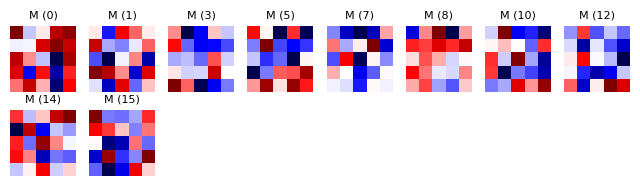

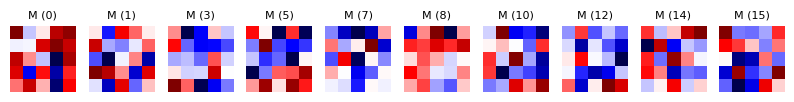

In [4]:
def test_imshow_matrix():
    m = np.random.normal(loc=0, scale=1, size=(5,5))
    imshow_matrix(m, title='M')

def test_imshow_nmatrix():
    data = [ np.random.normal(loc=0, scale=1, size=(5,5)) for i in range(0,16) ]
    imshow_nmatrix(data, title='M', tstep=3)
    imshow_nmatrix(data, title='M', tk=10)
    imshow_nmatrix(data, title='M', tk=10, ncols=10)

test_imshow_matrix()
test_imshow_nmatrix()

# Spikes

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})


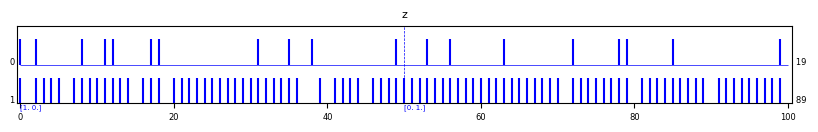

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})


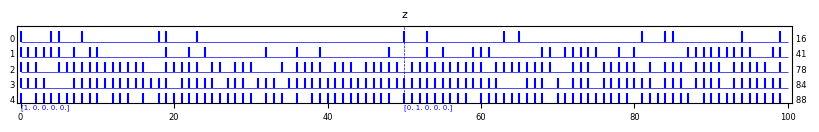

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})


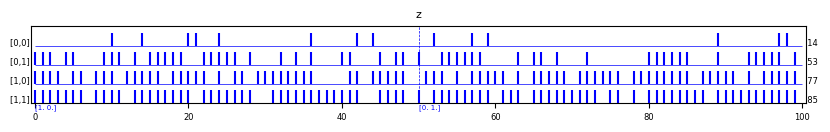

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})


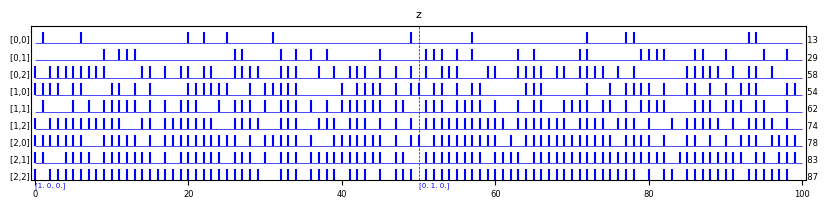

In [5]:
from spikeml.plot.plot_util import plot_hist, plot_data, plot_lidata, plot_input, plot_xt, plot_mt, plot_spikes, imshow_matrix, imshow_nmatrix

def test_spike(n=5, T=100):
    params = SSensorParams()
    print(params)
    s = np.linspace(.1,params.vmax,num=n)
    #ss = np.zeros(n)
    #ss = ss[np.newaxis, ...]
    ss = signal_pulse(n, T=T/2, s=[0,1], value=1)
    data = []
    for t in range(0,T):
        sz = spike(s, params)
        #print(t, s, sz)
        if t==0 or t==T-1:
            sz[0]=1
        data.append(sz)
        
    plot_spikes(data, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax))


def test_spike2(T=100):
    params = SSensorParams()
    print(params)
    n = 2
    s = np.linspace(.1,params.vmax,num=n*n)
    M = s.reshape(n, n)
    ss = signal_pulse(n, T=T/2, s=[0,1], value=1)
    data = []
    for t in range(0,T):
        cz = spike(M, params)
        #print(t, M, cz)
        data.append(cz)
        
    plot_spikes(data, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax))

def test_spike3(T=100):
    params = SSensorParams()
    print(params)
    n = 3
    s = np.linspace(.1,params.vmax,num=n*n)
    M = s.reshape(n, n)
    ss = signal_pulse(n, T=T/2, s=[0,1], value=1)
    #print(ss)
    data = []
    for t in range(0,T):
        cz = spike(M, params)
        #print(t, M, cz)
        data.append(cz)
        
    plot_spikes(data, title='z', name=None, heigth=2, callback=lambda ax: plot_input(ss,ax=ax))
    
test_spike(n=2)
test_spike(n=5)
test_spike2()
test_spike3()


SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})


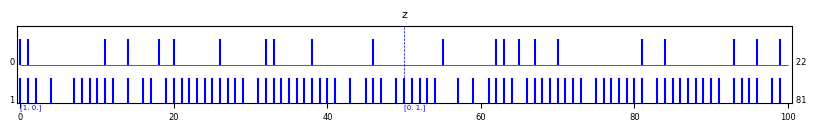

In [6]:
from spikeml.plot.plot_util import plot_hist, plot_data, plot_lidata, plot_input, plot_xt, plot_mt, plot_spikes, imshow_matrix, imshow_nmatrix

test_spike(n=2)